<a href="https://colab.research.google.com/github/abhijeetraj22/-TSF-GRIP_IOT_Tasks/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
from google.colab.patches import cv2_imshow

In [36]:
#importing the required libraries
import cv2 as cv 
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Copy the neural network architecture
cfg_file = '/content/drive/MyDrive/Grip/yolov3.cfg'

# Copy the pre-trained weights
weight_file = '/content/drive/MyDrive/Grip/yolov3.weights'

# Copy the names of the classes
namesfile = '/content/drive/MyDrive/Grip/coco.names'

In [5]:
#loading yolov3 by passing weights and cfg files
net = cv.dnn.readNet(weight_file,cfg_file)
classes=[]
with open(namesfile,"r") as f:
    classes = [line.strip() for line in f.readlines()]
model = cv.dnn_DetectionModel(net)

In [7]:
#there are 80 labels that yolov3 can identify
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
#defining the output layers
print(net.getLayerNames())

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [9]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [10]:
layer_names = net.getLayerNames()

In [11]:
outputLayers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [12]:
outputLayers

['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
colors = np.random.uniform(0,255,size=(len(classes),3))

In [14]:
#loading image
img = cv.imread("/content/drive/MyDrive/Grip/Parsons_PR.jpg")
h,w,c= img.shape

shape of image: 


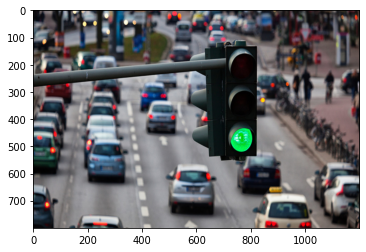

In [16]:
# displaying the original image
%matplotlib inline
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("shape of image: ".format(img.shape))
image_and_shapes("/content/drive/MyDrive/Grip/Parsons_PR.jpg")

In [17]:
#extracting features ie. detecting objects

blob = cv.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True, crop= False)

In [18]:
net.setInput(blob)
outs = net.forward(outputLayers)
print(outs[1])

[[0.01989063 0.02711788 0.04331711 ... 0.         0.         0.        ]
 [0.02164415 0.02626262 0.36620048 ... 0.         0.         0.        ]
 [0.02371548 0.02133686 0.07768884 ... 0.         0.         0.        ]
 ...
 [0.9748134  0.9698876  0.04519611 ... 0.         0.         0.        ]
 [0.97805065 0.9744495  0.3107998  ... 0.         0.         0.        ]
 [0.9758672  0.9796181  0.08199454 ... 0.         0.         0.        ]]


In [19]:
#finding confidence score of algorithm in object detection in blob
class_ids=[]
confidences =[]
boxes =[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        #object detected
        if confidence > 0.7:
            center_x= int(detection [0] * w)
            center_y= int(detection [1] * h)
            ww = int(detection [2] * w)
            hh = int(detection [3] * h)
            
            #coordinates of a rectangle
            x= int(center_x - ww/2)
            y= int(center_y - hh/2)
            
            boxes.append([x,y,ww,hh])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)

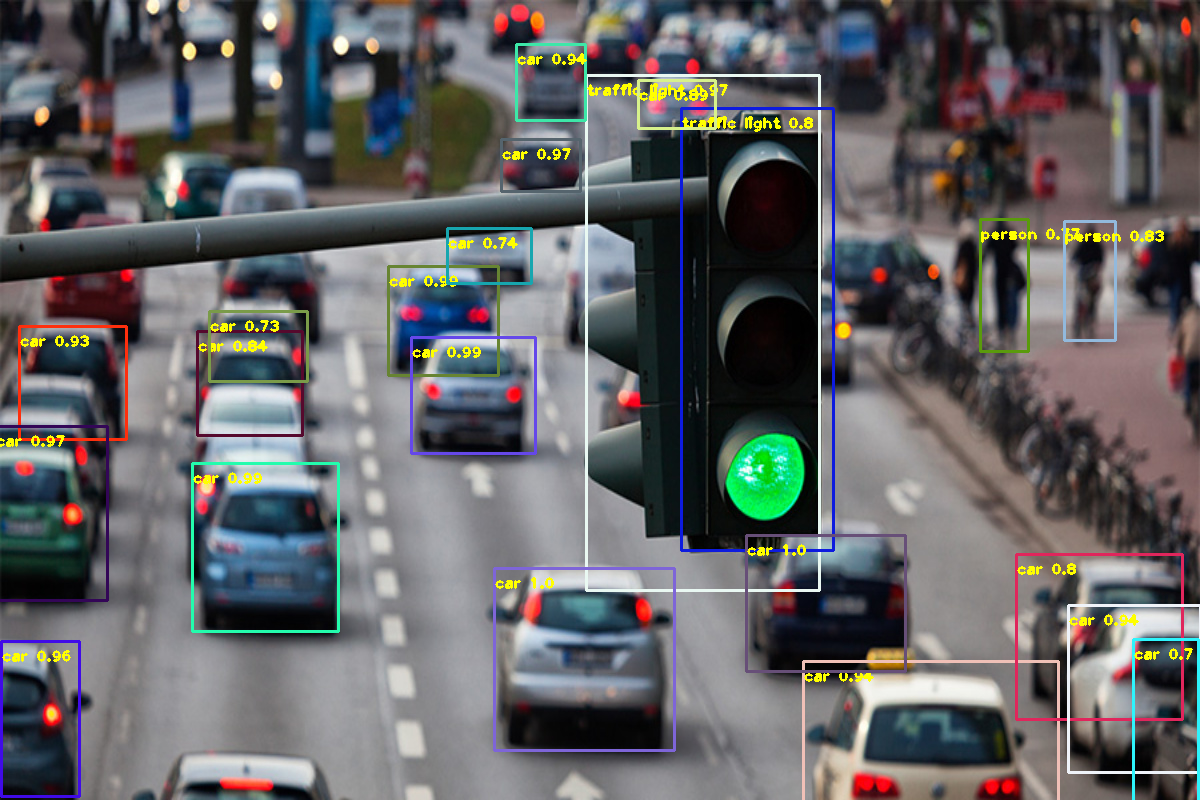

In [25]:
#to eliminate multiple detections for same object
#using non - max suppression
#anything with IOU_threshold < 0.6 will be removed
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6) 

# to loop over all the boxes
font = cv.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),3))
for i in range(len(boxes)):
    if i in indexes:
        x,y,ww,hh = boxes[i]
        label= str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
        cv.rectangle(img,(x,y),(x+ww,y+hh),color,2)
        cv.putText(img,label+" "+ confi,(x,y+20),font,1,(0,255,255),2)
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

## Object detection in video

In [26]:
#loading files
config= r'/content/drive/MyDrive/Grip/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenmodel = r'/content/drive/MyDrive/Grip/frozen_inference_graph.pb'
model = cv.dnn_DetectionModel(frozenmodel,config)

In [27]:
#scaling model
model.setInputParams(size=(416, 416), scale=1/255)

In [30]:
#loading video
cap = cv.VideoCapture("/content/drive/MyDrive/Grip/PexelsVideos2880.mp4")
if not cap.isOpened():
    raise IOError("cannot open video")

In [38]:
CONFIDENCE_THRESHOLD = 0.8
NMS_THRESHOLD = 0.4

In [40]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

AttributeError: ignored

In [34]:
vc = cv2.VideoCapture("/content/drive/MyDrive/Grip/PexelsVideos2880.mp4")

In [47]:
while cv2.waitKey(1) < 1:
    (grabbed, frame) = vc.read()
    if not grabbed:
        exit()

    start = time.time()
    classes,scores,boxes = model.detect(frame, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    end = time.time()

    start_drawing = time.time()
    for (classid, score, box) in zip(classes, scores, boxes):
        color = COLORS[int(classid) % len(COLORS)]
        label = "%s : %f" % (class_names[classid[0]], score)
        cv2.rectangle(frame, box, color, 2)
        cv2.putText(frame, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    end_drawing = time.time()

    fps_label = "FPS: %.2f (excluding drawing time of %.2fms)" % (1 / (end - start), (end_drawing - start_drawing) * 1000)
    cv2.putText(frame, fps_label, (0, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    frame = imutils.resize(frame, 900)
    cv2.imshow("detections", frame)

error: ignored

In [45]:
#breaking video frame by frame and detecting objects by predicting confidence
import imutils
while True:
    ret,frame = cap.read()
    ClassIndex, conf,bbox = model.detect(frame,0.6,0.4)
    if len(ClassIndex)!=0:
        for ClassInd, con, boxx in zip(ClassIndex.flatten(),conf.flatten(),bbox):
            if ClassInd <=80:
                
                cv.rectangle(frame, boxx,(255,0,0),2)
                cv.putText(frame, classes[ClassInd-1]+" "+ str(round(con,2)),(boxx[0],boxx[1]+20),cv.FONT_HERSHEY_COMPLEX,1,(0,255,255),2)
    frame = imutils.resize(frame,700)
    cv.imshow("output",frame)
    if cv.waitKey(2) & 0xFF == ord('a'):
        break
cap.release()
cv.destroyAllWindows()

error: ignored

In [4]:
import cv2
import matplotlib.pyplot as plt

#from utils import *
from darknet import Darknet

ImportError: ignored

In [ ]:
# Copy the neural network architecture
cfg_file = '/content/drive/MyDrive/Grip/yolov3.cfg'

# Copy the pre-trained weights
weight_file = '/content/drive/MyDrive/Grip/yolov3.weights'

# Copy the names of the classes
namesfile = '/content/drive/MyDrive/Grip/coco.names'

# Load the neural network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the names of the classes
class_names = load_class_names(namesfile)

## You can visualize the neural network in YOLOv3 by uncommenting the following command
# m.print_network()

In [ ]:
# Load the image
img = cv2.imread('./images/manbike.jpg')

# Converting the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resizing the image
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Input Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Input Image')
plt.imshow(resized_image)
plt.show()

In [ ]:
# Non-Maximal Suppression Threshold is a parameter to keep only the best bounding box.
# Bounding boxes with detection probability less than 0.6 are not selected.
nms_threshold_probability = 0.6

# Intersection Over Union Threshold is a parameter that eliminates boxes with high intersection over union values.
# Bounding boxes with intersection over union of more than 0.4 are not selected.
iou_threshold_probability = 0.4

# The following command detects the objects in the image
boxes = detect_objects(m, resized_image, iou_threshold_probability, nms_threshold_probability)

# The following command prints the objects identified and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)